## Beta
- https://www.investopedia.com/investing/beta-know-risk/

$Beta = \frac{Covariance}{Variance}$

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sp500 = pd.read_csv("sp500-m.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl-m.csv", index_col=0, parse_dates=True)

In [5]:
ticker = 'AAPL'
col = 'Adj Close'

data = pd.concat([sp500['Adj Close'], aapl['Adj Close']], axis=1)
data.columns = ['SP500', ticker]

In [7]:
data = np.log(data/data.shift())

In [8]:
data.head()

,SP500,AAPL
Date,,
2015-11-01,NaN,NaN
2015-12-01,-0.017686,-0.112519
2016-01-01,-0.052068,-0.078223
2016-02-01,-0.004137,-0.006700
2016-03-01,0.063905,0.125158


In [11]:
cov = data.cov().iloc[0, 1]

In [12]:
cov

0.0024656309886439743

In [14]:
var = data['SP500'].var()

In [15]:
beta = cov/var

In [16]:
beta

1.2783253531221666

<IPython.core.display.Javascript object>


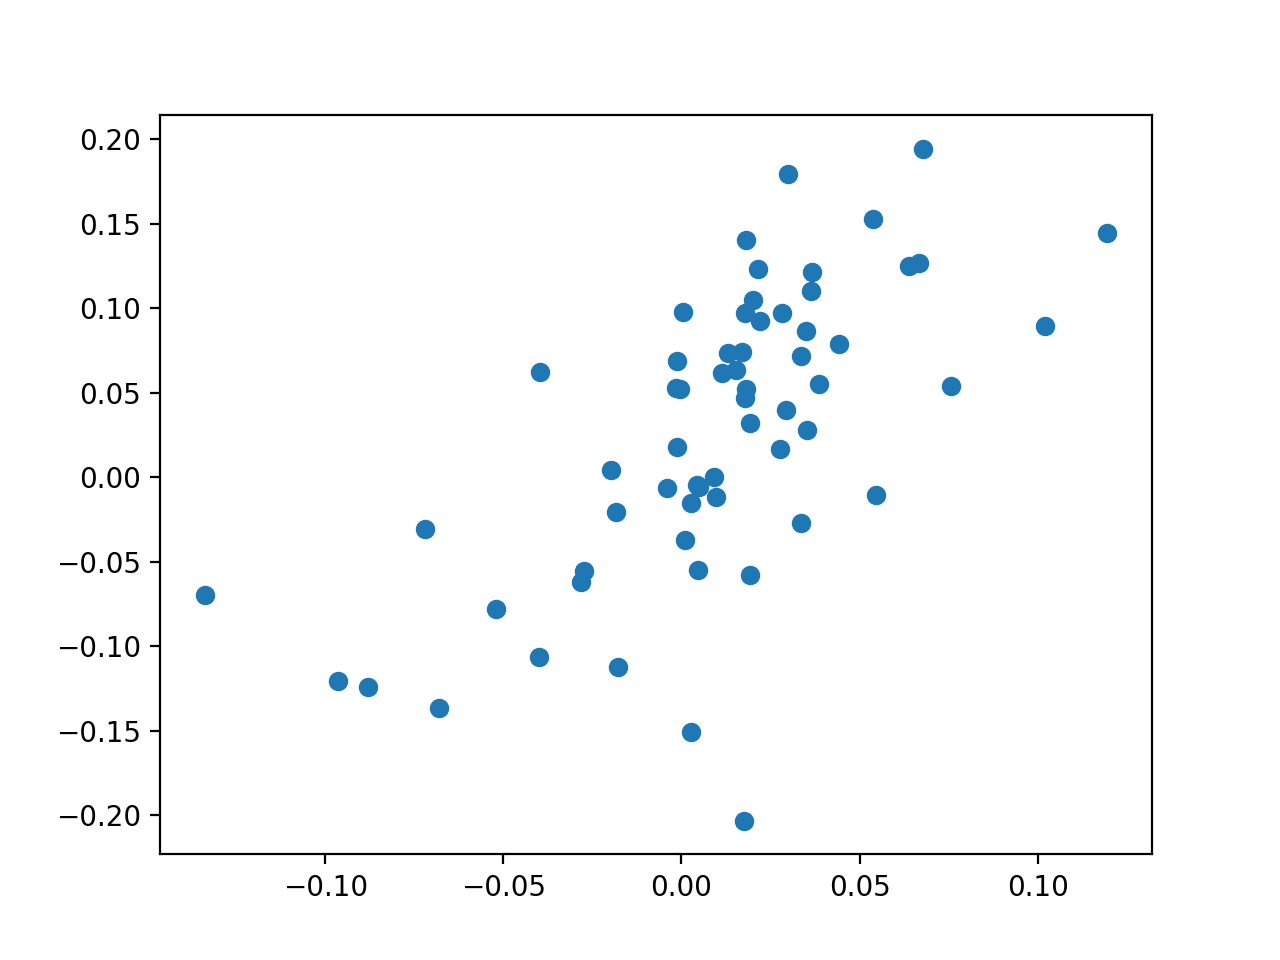

In [18]:
fig, ax = plt.subplots()
ax.scatter(data['SP500'], data['AAPL'])

In [20]:
X = data['SP500'].iloc[1:].values.reshape(-1, 1)
Y = data['AAPL'].iloc[1:].values.reshape(-1, 1)

lin_regresor = LinearRegression()
lin_regresor.fit(X, Y)
beta = lin_regresor.coef_

In [21]:
beta

array([[1.27832535]])